# Kickstarter Analysis

Data Analysis carried out for over 4000 art projects. Data collected include project state, country, USD static rate, category, spotlight and USD pledged among others. Objective is to determine the various factors affecting success of a project in terms on funding.

In [1]:
%matplotlib inline  
#to ensure we get the plot in our notebook
#import the libraries we will use for this analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load Amount Pleged in USD data from our kickstarter dataset

In [2]:
#Load our dataset with required columns, delimiter and data type
usd_pledged=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",usecols=11,skiprows=1)

# 2.Descriptive Statistics are calculated - count, minimum, maximum, mean, median, standard deviation

In [3]:
countme=usd_pledged.shape[0] #get dimensions of array - no. of rows
print("The total no of projects are " + str(countme))
usd_pledged_min=np.min(usd_pledged)
print("The min amount pledged is  = "+ "$%.2f" % (usd_pledged_min)) #numpys built-in functions are used here
usd_pledged_max=np.max(usd_pledged)
print("The max amount pledged is  = "+ "$%.2f" % (usd_pledged_max))
usd_pledged_mean=np.mean(usd_pledged)
print("The mean amount pledged is  = "+ "$%.2f" % (usd_pledged_mean))
usd_pledged_median=np.median(usd_pledged)
print("The median amount pledged is  = "+ "$%.2f" % (usd_pledged_median))
usd_pledged_sd=np.std(usd_pledged)
print("The Standard Deviation of the amounts pledged is  = "+ "$%.2f" % (usd_pledged_sd))
usd_pledged_atleast=np.count_nonzero(usd_pledged>=2500) #usd pleged greater than 2500
project_atleast=(usd_pledged_atleast/countme)*100
print("The percentage of projects with atleast 2500$ USD pledged   = "+ "%.2f" % (project_atleast) + " %") #print result

The total no of projects are 4184
The min amount pledged is  = $0.00
The max amount pledged is  = $111111.77
The mean amount pledged is  = $1242.12
The median amount pledged is  = $90.00
The Standard Deviation of the amounts pledged is  = $5177.93
The percentage of projects with atleast 2500$ USD pledged   = 10.59 %


# 3.Load Project Categories data from our kickstarter dataset

In [4]:
#Load our dataset with required columns, delimiter and data type
category=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",dtype=str,usecols=12,skiprows=1)

# 4.Visualizing the percentage of observations in each category

In [5]:
values, frequencies = np.unique(category, return_counts=True) #determine the unique categories and frequencies of each category
print('The Unique categories are: ')
for z in values:
    print(z)
print("")
print('The frequencies of these categories are: ')
for d in frequencies:
    print(d)
print("")
proportion_category=(frequencies/len(category))*100 #calculating the proportion
print('The proportion of observation of these categories are: ')
for e in proportion_category:
    print("%.2f" %(e) + "%") #print result

The Unique categories are: 
Ceramics
Conceptual Art
Digital Art
Illustration
Painting

The frequencies of these categories are: 
204
879
1054
461
1586

The proportion of observation of these categories are: 
4.88%
21.01%
25.19%
11.02%
37.91%


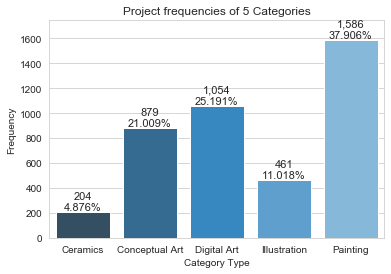

In [6]:
title = f'Project frequencies of {len(values):,} Categories' #give a title
sns.set_style('whitegrid')
axes = sns.barplot(x=values, y=frequencies, palette='Blues_d',saturation=1) #set x and y axis for barplot
axes.set_title(title)
axes.set(xlabel='Category Type', ylabel='Frequency')  
axes.set_ylim(top=max(frequencies) * 1.10)

for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency / len(category):.3%}' #displaying frequency and percentage on bars
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

plt.show()

# 5.Inferences
Paintings are the most frequent category.Illustration combined with this accounts for half the percentage of projects.         
Digital and Categorical Art are the second and third most popular type of projects.                                            
Ceramics is the least popular category for an aspiring entrepreneur that requires funding.

# 6.Load categories and States data from our kickstarter dataset

In [7]:
#Load our dataset with required columns, delimiter and data type
mix=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",dtype=str,usecols=(12,4),skiprows=1)

# 7.Visualizing the percentage of observations in each category

In [8]:
countlist=[0,0,0,0,0] #calculating the count of each successful project by category
for i,j in mix:
    if (j=='successful'):
        if (i==values[0]):
            countlist[0]+=1
        if (i==values[1]):
            countlist[1]+=1
        if (i==values[2]):
            countlist[2]+=1
        if (i==values[3]):
            countlist[3]+=1
        if (i==values[4]):
            countlist[4]+=1

In [9]:
newlist=(countlist/frequencies) * 100  #calculating the proportion of success
print('The percentage of successful projects for each category are: ')
for t in newlist:
    print("%.2f" %(t) + "%") #print result

The percentage of successful projects for each category are: 
41.18%
36.63%
27.13%
0.00%
0.00%


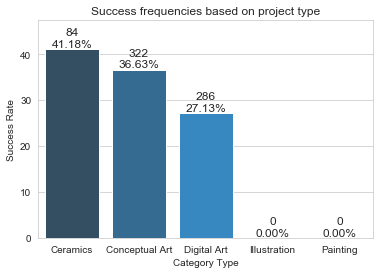

In [10]:
title = f'Success frequencies based on project type' #give a title
sns.set_style('whitegrid')
axes=sns.barplot(x=values, y=newlist, palette='Blues_d',saturation=1)  #set x and y axis for barplot
axes.set_title(title)
axes.set(xlabel='Category Type', ylabel= 'Success Rate')
axes.set_ylim(top=max(newlist)*1.15)

for frequency,bar,percentage in zip(countlist,axes.patches,newlist):
    text_x=bar.get_x()+bar.get_width()/2.0
    text_y=bar.get_height()
    text=f"{frequency:}\n{percentage/100:.2%}" #displaying frequency and percentage on bars
    axes.text(text_x,text_y,text,
              fontsize=12,ha='center',va='bottom')
                 
plt.show() #display our plot

On average Ceramics was the most successful. Illustration and Painting were the least successful. These were infact not successful !.Their success rate is 0%. This is interesting as paintings were infact the most popular category as seen before.

# 8.Load staffpick, spotlight data from our kickstarter dataset

In [11]:
#Load our dataset with required columns, delimiter and data type
best=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",dtype=str,usecols=(8,13),skiprows=1)

# 9.Calcuating the total no. of staff pick and spotlight projects and the success rate of each project classification

In [12]:
n=best[:,:1] #select staff pick column 
count_staff_pick=0
for i in n:
    if (i=='TRUE'): #calculate no. of staff pick projects
        count_staff_pick+=1
print("The total no of staff pick projects are: " + str(count_staff_pick)) #print result

The total no of staff pick projects are: 224


In [13]:
m=best[:,1:2] #select spotlight column 
count_spotlight=0
for i in m:
    if (i=='TRUE'): #calculate no. of spotlight projects
        count_spotlight+=1 
print("The total no of spotlight projects are: " + str(count_spotlight)) #print result

The total no of spotlight projects are: 692


In [14]:
#Load our dataset with staff pick and success data
staff=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",dtype=str,usecols=(8,4),skiprows=1)
count_staff_pick_success=0
for i,j in staff:
    if (j=='successful'): 
        if (i=='TRUE'):
            count_staff_pick_success+=1
staff_success_rate=(count_staff_pick_success/count_staff_pick)*100 #calculate staff pick success rate
print("The percentage of staff pick projects that were successful are: " + "%.2f" %(staff_success_rate) +" %") #print result

The percentage of staff pick projects that were successful are: 72.77 %


In [15]:
#Load our dataset with spotlight and success data
spot=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",dtype=str,usecols=(13,4),skiprows=1)
count_spotlight_success=0
for i,j in spot:
    if (j=='successful'):
        if (i=='TRUE'):
            count_spotlight_success+=1
spotlight_success_rate=(count_spotlight_success/count_spotlight)*100 #calculate spotlight success rate
print("The percentage of spotlight projects that were successful are: " +"%.2f" %(spotlight_success_rate) +" %") #print result

The percentage of spotlight projects that were successful are: 100.00 %


# 10.Inference                                                                                                                   
Projects identified by staff were successful only roughly 70% of the time.                                                
However,Projects featured under Spotlight were all successful !                                                                
Since Spotlight projects draw more attention, they attract more funding and hence have a higher chance of success.             
Hence, an aspiring art entrepreneur should ensure that their projects get identified as spotlight, for successful funding.

# 11.Further Analysis with Insights 
# How USD Static rate affects success of a project
# Load USD static rate and state data from our kickstarter dataset
These are loaded seperately and zipped later on for performing calculations

In [16]:
#Load our dataset with usd static rate with default data type float
vivek_obs=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",usecols=(10),skiprows=1)

In [17]:
#Load our dataset with success data with data type string
vivek_obs2=np.loadtxt("C:/Users/vivek_000/Desktop/Python/HW4_kickstarter.csv",delimiter=",",dtype=str,usecols=(4),skiprows=1)

# Calcuating the total no. of successful projects and the success rate based on USD static rate
The USD static rate has been divided into 3 categories:                                                                        
'<1' : eg: India, China                                                                                                        
'>1' : eg: Great Britain                                                                                                       
'=1' : USA                                                                                                          

In [18]:
countlist2=[0,0,0] 
for p in vivek_obs:
    if p<1:
        countlist2[0]+=1 #calculating the total count based on usd static category
    elif p>1:
        countlist2[1]+=1
    else:
        countlist2[2]+=1

In [19]:
countlist2_successful=[0,0,0]
for p,o in zip(vivek_obs,vivek_obs2): 
    if o == 'successful':
            if p<1:
                countlist2_successful[0]+=1  #calculating the count for successful state projects
            elif p>1:
                countlist2_successful[1]+=1
            else:
                countlist2_successful[2]+=1

In [20]:
newlist2 = [ (i/j)*100 for i,j in zip(countlist2_successful, countlist2)] #calculating the success rate

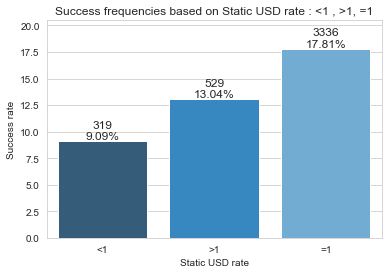

In [21]:
static=["<1",">1","=1"] #give a title
title = f'Success frequencies based on Static USD rate : <1 , >1, =1'
sns.set_style('whitegrid')
axes=sns.barplot(x=static, y=newlist2, palette='Blues_d',saturation=1) #set x and y axis for barplot
axes.set_title(title)
axes.set(xlabel='Static USD rate', ylabel='Success rate') 
axes.set_ylim(top=max(newlist2)*1.15)

for frequency,bar,percentage in zip(countlist2,axes.patches,newlist2):
    text_x=bar.get_x()+bar.get_width()/2.0
    text_y=bar.get_height()
    text=f"{frequency:}\n{percentage/100:.2%}" #displaying frequency and percentage on bars
    axes.text(text_x,text_y,text,
              fontsize=12,ha='center',va='bottom')
                 
plt.show() #display our plot

# Inference based on USD static rate

Out of all the projects based out of the USA (static usd rate = 1), close to 18% of all projects were the most successful in obtaining funding.
In countries like Great Britain were the static USD rate is >1, the projects that were successful in obtaining funding was about 13%.
In countries like India were the static USD rate is <1,  the projects that were successful was the lowest at just about 9%.
Hence, the USD Static rate is also is a pivotal factor in the success of a project. Projects based out of USA have a higher chance of success.